In [1]:
import pandas as pd
df = pd.read_csv("/workspaces/Machine-Learning-1st-Assigmnment/car_fuel_efficiency.csv")
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [2]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [3]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

[170 130 220 210 190]
36

[ 3.  5. nan  4.  1.]
14

[159.  97.  78.  nan 140.]
192

[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

[17.7 17.8 15.1 20.2 14.4]
162

[2003 2007 2018 2009 2008]
24

['Europe' 'USA' 'Asia']
3

['Gasoline' 'Diesel']
2

['All-wheel drive' 'Front-wheel drive']
2

[ 0.  2. -1.  1. nan]
9

[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

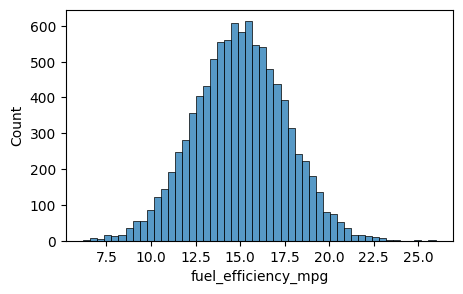

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(5,3))
%matplotlib inline

sns.histplot(df['fuel_efficiency_mpg'],bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

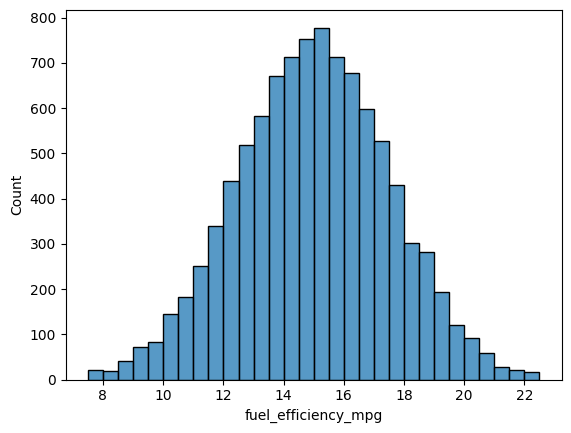

In [5]:
sns.histplot(df['fuel_efficiency_mpg'][(df['fuel_efficiency_mpg'] >= 7.5)
& (df['fuel_efficiency_mpg'] <= 22.5)],bins=30)

In [6]:
msg_log=np.log1p(df['fuel_efficiency_mpg'])
msg_log

0       2.655474
1       2.687046
2       2.724340
3       2.885512
4       2.601828
          ...   
9699    2.778931
9700    2.942454
9701    2.900684
9702    2.793099
9703    2.765342
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

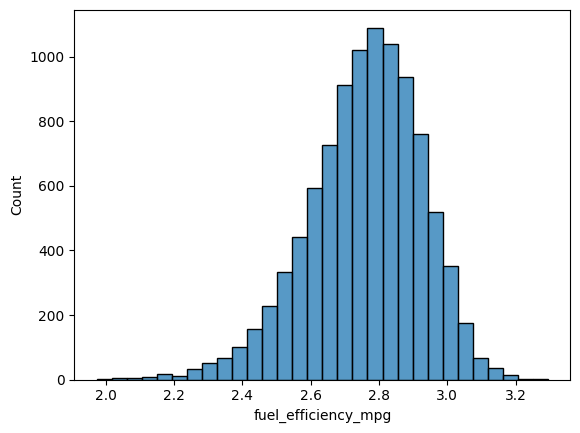

In [7]:
sns.histplot(msg_log,bins=30)

In [8]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [9]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n_train, n_val, n_test

(5824, 1940, 1940)

In [10]:
df_val = df.iloc[ :n_val]
df_test = df.iloc[n_val : n_val + n_test]
df_train = df.iloc[n_val + n_test : ]

df_test.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1940,210,3.0,171.0,3399.802053,13.7,2020,Europe,Gasoline,All-wheel drive,0.0,12.943405
1941,190,8.0,130.0,2842.855987,14.1,2021,Asia,Diesel,Front-wheel drive,NaN,15.586501
1942,210,3.0,138.0,2876.923407,18.5,2001,Europe,Diesel,Front-wheel drive,-1.0,14.587988
1943,250,0.0,150.0,3348.714813,14.1,2014,USA,Gasoline,All-wheel drive,0.0,12.905452
1944,130,4.0,151.0,2479.816512,NaN,2009,USA,Gasoline,All-wheel drive,-1.0,17.475198


In [11]:

idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [12]:
df_val = df.iloc[idx[ :n_val]]
df_test = df.iloc[idx[n_val : n_val + n_test]]
df_train = df.iloc[idx[n_val + n_test : ]]

In [13]:
df_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
246,170,3.0,164.0,2990.040917,9.7,2019,Europe,Diesel,Front-wheel drive,0.0,15.963019
8125,170,4.0,NaN,2729.623741,13.2,2012,USA,Gasoline,All-wheel drive,0.0,15.931964
1927,200,4.0,142.0,3126.513375,17.3,2019,Asia,Diesel,All-wheel drive,0.0,14.284901
8235,200,3.0,148.0,3136.477901,15.5,2003,USA,Diesel,Front-wheel drive,-2.0,14.865210
424,230,4.0,141.0,3384.681613,15.9,2006,USA,Gasoline,Front-wheel drive,-3.0,12.428822


In [14]:
len(df_train),len(df_val),len(df_test)

(5824, 1940, 1940)

In [15]:
df_val = df.iloc[idx[ :n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_val : n_val + n_test]].reset_index(drop=True)
df_train = df.iloc[idx[n_val + n_test : ]].reset_index(drop=True)

In [16]:
df_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,164.0,2990.040917,9.7,2019,Europe,Diesel,Front-wheel drive,0.0,15.963019
1,170,4.0,NaN,2729.623741,13.2,2012,USA,Gasoline,All-wheel drive,0.0,15.931964
2,200,4.0,142.0,3126.513375,17.3,2019,Asia,Diesel,All-wheel drive,0.0,14.284901
3,200,3.0,148.0,3136.477901,15.5,2003,USA,Diesel,Front-wheel drive,-2.0,14.865210
4,230,4.0,141.0,3384.681613,15.9,2006,USA,Gasoline,Front-wheel drive,-3.0,12.428822


In [17]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

y_train.shape, y_val.shape, y_test.shape

((5824,), (1940,), (1940,))

In [18]:
del y_train, y_val, y_test

In [19]:
df_train.iloc[10]

engine_displacement                  260
num_cylinders                        6.0
horsepower                         174.0
vehicle_weight                 3055.9482
acceleration                        11.9
model_year                          2012
origin                              Asia
fuel_type                       Gasoline
drivetrain             Front-wheel drive
num_doors                            0.0
fuel_efficiency_mpg            15.232988
Name: 10, dtype: object

In [20]:
xi = [260, 11.90, 174.0]
w0 = 7.15 # assumptions just for testing only
w1 = [0.02, 0.9, 0.005] # assumptions just for testing only

In [21]:
def linear_regression(xi):
    pred = w0
    for j in range(len(xi)):
        pred += w1[j] * xi[j]
    return pred

In [22]:
linear_regression(xi)


23.930000000000003

In [23]:
np.expm1(23.93)

np.float64(24698293767.599934)

In [26]:
np.log1p(24698293767.599934)

np.float64(23.93)